In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/KULIAH/SML/final_df.csv')
df

,content,score_cat,thumbsUpCount,word_count,has_promo,final_label,label,pseudo_prob
0,"udah bayar masa ga muncul barcode nya, udah di...",1,0.0,16.0,0,0,NaN,NaN
1,trimakasih,5,0.0,1.0,0,0,NaN,NaN
2,"gajelas, terlalu banyak peminat mulu",1,0.0,5.0,0,0,NaN,NaN
3,malam ka saya mau tanya aplikasi qpon aku seti...,5,0.0,33.0,0,0,NaN,NaN
4,Aplikasi Qpon benar-benar bikin hidup lebih he...,5,0.0,44.0,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...
3307,Aplikasi apaaan ini masa dari bisa beli vocher...,1,10.0,30.0,0,0,NaN,0.001736
3308,Semenjak ada di Playstore gak bisa buat beli p...,1,5.0,13.0,0,0,NaN,0.001294
3309,"Buruk,baru daftar masa mau beli gak bisa, tert...",1,10.0,16.0,0,0,NaN,0.001359
3310,"Kinerja cs buruk, aplikasi mudah error.",1,22.0,6.0,0,0,NaN,0.001989


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   content        3312 non-null   object 
 1   score_cat      3312 non-null   int64  
 2   thumbsUpCount  3312 non-null   float64
 3   word_count     3312 non-null   float64
 4   has_promo      3312 non-null   int64  
 5   final_label    3312 non-null   int64  
 6   label          0 non-null      float64
 7   pseudo_prob    2713 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 207.1+ KB


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud
import nltk
import re

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)     # hapus url
    text = re.sub(r"[^a-zA-Z0-9 ]", " ", text)      # hapus simbol
    text = re.sub(r"\s+", " ", text)                # hapus spasi ganda
    return text.strip()

In [10]:
df["clean_content"] = df["content"].apply(clean_text)

## Distribusi label

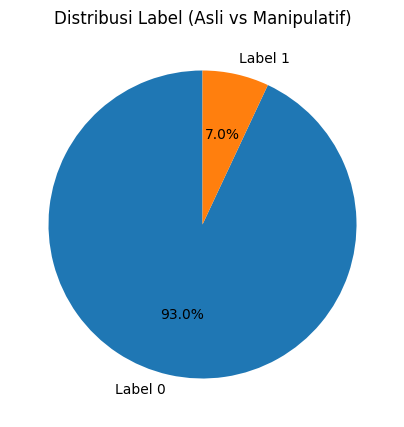

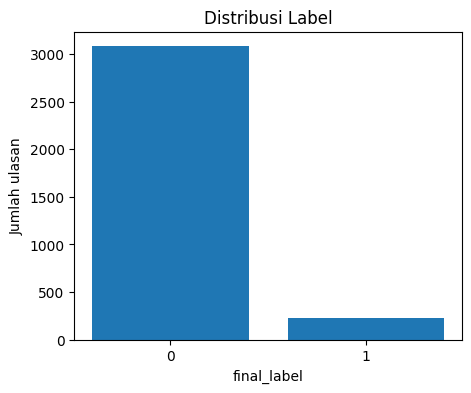

In [11]:
label_counts = df["final_label"].value_counts().sort_index()

plt.figure(figsize=(5,5))
plt.pie(
    label_counts.values,
    labels=[f"Label {i}" for i in label_counts.index],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribusi Label (Asli vs Manipulatif)")
plt.show()

plt.figure(figsize=(5,4))
plt.bar(label_counts.index.astype(str), label_counts.values)
plt.xlabel("final_label")
plt.ylabel("Jumlah ulasan")
plt.title("Distribusi Label")
plt.show()

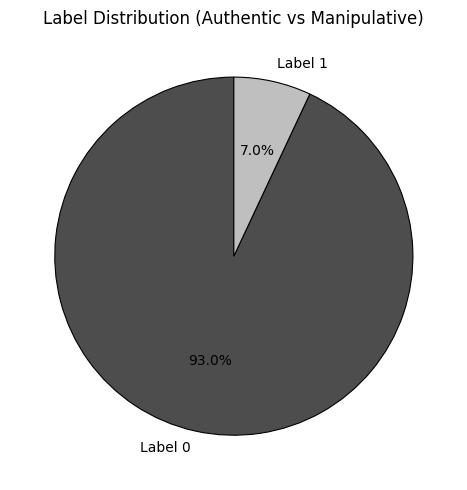

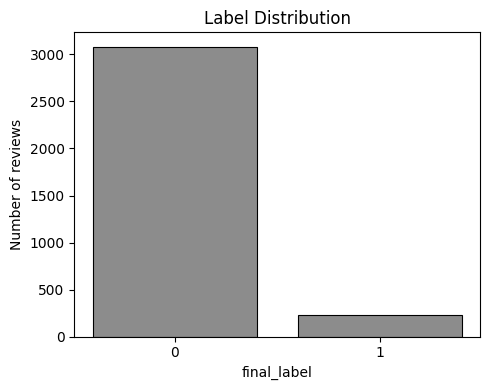

In [13]:
label_counts = df["final_label"].value_counts().sort_index()

# === Pie Chart (Grayscale) ===
plt.figure(figsize=(5,5))
plt.pie(
    label_counts.values,
    labels=[f"Label {i}" for i in label_counts.index],
    autopct="%1.1f%%",
    startangle=90,
    colors=["#4D4D4D", "#BFBFBF"],  # abu-abu tua & abu-abu muda
    wedgeprops={"edgecolor": "black", "linewidth": 0.8}
)
plt.title("Label Distribution (Authentic vs Manipulative)")
plt.tight_layout()
plt.show()


# === Bar Chart (Grayscale) ===
plt.figure(figsize=(5,4))
plt.bar(
    label_counts.index.astype(str),
    label_counts.values,
    color="#8C8C8C",      # abu-abu netral
    edgecolor="black",
    linewidth=0.8
)
plt.xlabel("final_label")
plt.ylabel("Number of reviews")
plt.title("Label Distribution")
plt.tight_layout()
plt.show()


## Distribusi rating (score_cat) per label

Tabel distribusi rating per label:
final_label     0    1
score_cat             
1            1435    3
2             185    2
3             124    0
4              84    0
5            1253  226


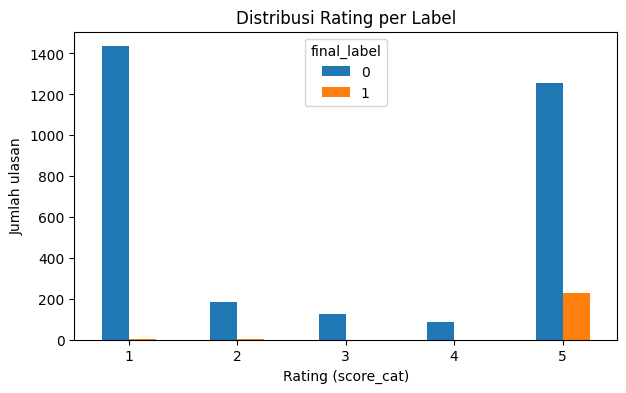

In [14]:
cross_rating = pd.crosstab(df["score_cat"], df["final_label"])

print("Tabel distribusi rating per label:")
print(cross_rating)

cross_rating.plot(kind="bar", figsize=(7,4))
plt.xlabel("Rating (score_cat)")
plt.ylabel("Jumlah ulasan")
plt.title("Distribusi Rating per Label")
plt.legend(title="final_label")
plt.xticks(rotation=0)
plt.show()

Tabel distribusi rating per label:
final_label     0    1
score_cat             
1            1435    3
2             185    2
3             124    0
4              84    0
5            1253  226


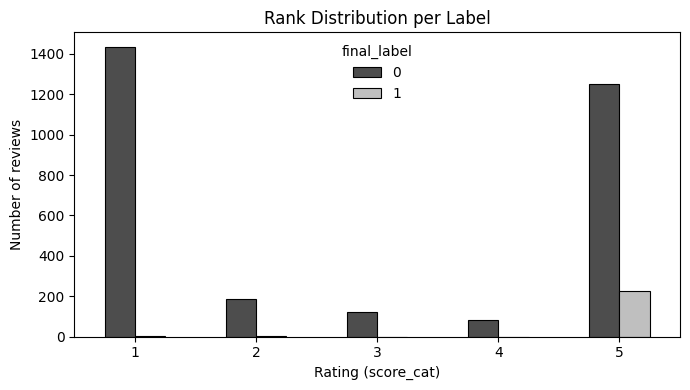

In [16]:
cross_rating = pd.crosstab(df["score_cat"], df["final_label"])

print("Tabel distribusi rating per label:")
print(cross_rating)

# === Bar Chart Grayscale (IEEE style) ===
ax = cross_rating.plot(
    kind="bar",
    figsize=(7,4),
    color=["#4D4D4D", "#BFBFBF"],  # abu-abu tua & muda
    edgecolor="black",
    linewidth=0.8
)

plt.xlabel("Rating (score_cat)")
plt.ylabel("Number of reviews")
plt.title("Rank Distribution per Label")
plt.legend(title="final_label", frameon=False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## WordCloud per label

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


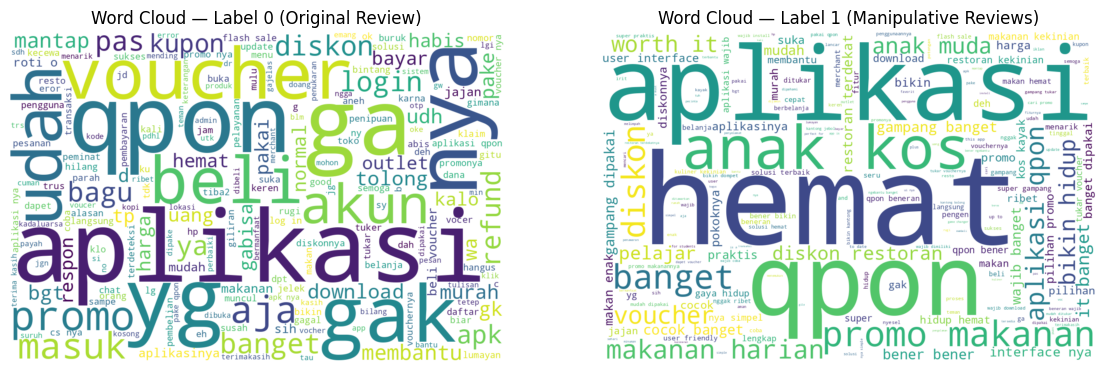

In [18]:
nltk.download('stopwords')
stopwords_id = set(stopwords.words('indonesian'))

text_0 = " ".join(df[df["final_label"] == 0]["clean_content"].tolist())
text_1 = " ".join(df[df["final_label"] == 1]["clean_content"].tolist())

wc0 = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    stopwords=stopwords_id
).generate(text_0)

wc1 = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    stopwords=stopwords_id
).generate(text_1)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.imshow(wc0, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud — Label 0 (Original Review)")

plt.subplot(1, 2, 2)
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud — Label 1 (Manipulative Reviews)")

plt.show()

## Rata-rata panjang teks (word_count)


Ringkasan word_count per label:
                  mean  median   min   max  count
final_label                                      
0            16.202856    12.0   1.0  97.0   3081
1            45.675325    46.0  17.0  77.0    231


<Figure size 500x400 with 0 Axes>

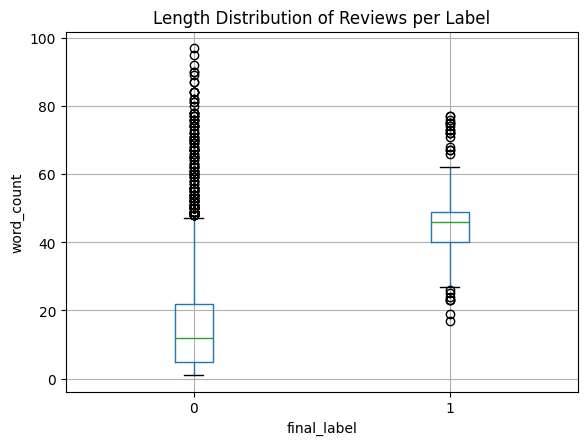

In [20]:
mean_wc = df.groupby("final_label")["word_count"].agg(["mean", "median", "min", "max", "count"])
print("\nRingkasan word_count per label:")
print(mean_wc)

plt.figure(figsize=(5,4))
df.boxplot(column="word_count", by="final_label")
plt.title("Length Distribution of Reviews per Label")
plt.suptitle("")
plt.xlabel("final_label")
plt.ylabel("word_count")
plt.show()

## Rata-rata thumbsUpCount per label


Ringkasan thumbsUpCount per label:
                  mean  median  min    max  count
final_label                                      
0             5.405388     0.0  0.0  535.0   3081
1            22.632035     5.0  0.0  544.0    231


<Figure size 500x400 with 0 Axes>

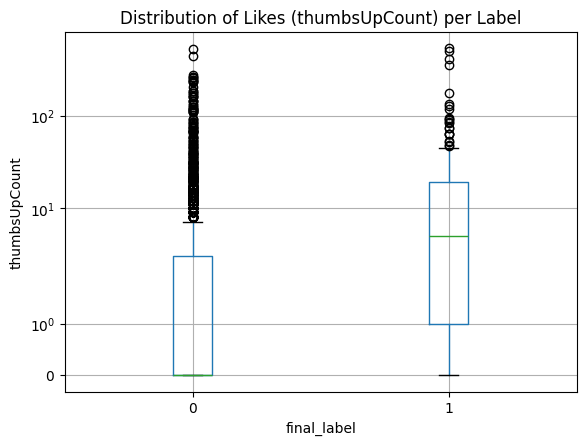

In [22]:
mean_thumbs = df.groupby("final_label")["thumbsUpCount"].agg(["mean", "median", "min", "max", "count"])
print("\nRingkasan thumbsUpCount per label:")
print(mean_thumbs)

plt.figure(figsize=(5,4))
df.boxplot(column="thumbsUpCount", by="final_label")
plt.title("Distribution of Likes (thumbsUpCount) per Label")
plt.suptitle("")
plt.xlabel("final_label")
plt.ylabel("thumbsUpCount")
plt.yscale("symlog")  # kalau banyak nol dan outlier besar
plt.show()

## Contoh ulasan manipulatif dengan probabilitas tertinggi

In [23]:
if "pseudo_prob" in df.columns:
    top_manip = (
        df[df["final_label"] == 1]
        .sort_values("pseudo_prob", ascending=False)
        .head(20)
    )
    print("\n20 ulasan manipulatif dengan probabilitas tertinggi:")
    print(top_manip[["content", "pseudo_prob", "score_cat", "thumbsUpCount", "word_count", "has_promo"]])
else:
    print("\nKolom 'pseudo_prob' tidak ada di df. Tidak bisa ambil contoh berdasarkan probabilitas.")


20 ulasan manipulatif dengan probabilitas tertinggi:
                                                content  pseudo_prob  \
935   Qpon bener-bener aplikasi yang wajib banget bu...     0.997002   
938   Aplikasi Qpon ini beneran bikin hidup lebih he...     0.996966   
858   Qpon benar-benar aplikasi yang wajib dimiliki!...     0.996964   
1234  Aplikasi Qpon ini bener-bener bikin hidup hema...     0.996949   
926   Aplikasi ini beneran *wajib punya*! 🌟 Semua pr...     0.996942   
1328  Qpon beneran solusi terbaik buat anak kos atau...     0.996938   
1004  Aplikasi Qpon bener-bener bikin hidup jadi leb...     0.996936   
729   Aku sudah coba pakai Qpon, dan serius aplikasi...     0.996927   
942   Aplikasi Qpon ini beneran juara buat anak kos!...     0.996926   
816   Aplikasi Qpon beneran gokil! 🎉 User interface-...     0.996922   
1302  Aplikasi Qpon ini bener-bener ngebantu banget ...     0.996906   
1377  Aplikasi Qpon ini benar-benar #WorthIt banget!...     0.996905   
1357  Apli

In [24]:
if "pseudo_prob" in df.columns:
    top_manip = (
        df[df["final_label"] == 1]
        .sort_values("pseudo_prob", ascending=False)
        .head(20)
        [["content", "pseudo_prob", "score_cat", "thumbsUpCount", "word_count", "has_promo"]]
    )

    print("20 ulasan manipulatif dengan probabilitas tertinggi:")
    display(top_manip)   # tampil sebagai tabel
else:
    print("Kolom 'pseudo_prob' tidak ada di df. Tidak bisa ambil contoh berdasarkan probabilitas.")


20 ulasan manipulatif dengan probabilitas tertinggi:


,content,pseudo_prob,score_cat,thumbsUpCount,word_count,has_promo
935,Qpon bener-bener aplikasi yang wajib banget bu...,0.997002,5,0.0,45.0,1
938,Aplikasi Qpon ini beneran bikin hidup lebih he...,0.996966,5,0.0,45.0,1
858,Qpon benar-benar aplikasi yang wajib dimiliki!...,0.996964,5,0.0,44.0,1
1234,Aplikasi Qpon ini bener-bener bikin hidup hema...,0.996949,5,5.0,50.0,1
926,Aplikasi ini beneran *wajib punya*! 🌟 Semua pr...,0.996942,5,0.0,46.0,1
1328,Qpon beneran solusi terbaik buat anak kos atau...,0.996938,5,31.0,44.0,1
1004,Aplikasi Qpon bener-bener bikin hidup jadi leb...,0.996936,5,19.0,46.0,1
729,"Aku sudah coba pakai Qpon, dan serius aplikasi...",0.996927,5,23.0,51.0,1
942,Aplikasi Qpon ini beneran juara buat anak kos!...,0.996926,5,12.0,47.0,1
816,Aplikasi Qpon beneran gokil! 🎉 User interface-...,0.996922,5,7.0,46.0,1


In [32]:
from google.colab import files

files.download('top_20_manipulative_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
top_manip_latex = top_manip.to_latex(
    index=False,
    float_format="%.3f",
    caption="Top 20 Ulasan Manipulatif dengan Probabilitas Tertinggi",
    label="tab:top_manipulative_reviews"
)

print(top_manip_latex)


\begin{table}
\caption{Top 20 Ulasan Manipulatif dengan Probabilitas Tertinggi}
\label{tab:top_manipulative_reviews}
\begin{tabular}{lrrrrr}
\toprule
content & pseudo_prob & score_cat & thumbsUpCount & word_count & has_promo \\
\midrule
Qpon bener-bener aplikasi yang wajib banget buat anak kos kayak aku! 🎉 Banyak pilihan promo makanan harian yang bikin dompet tetap aman. Cara pakainya super gampang, tinggal beberapa klik aja udah dapet diskon restoran terdekat. Hemat tiap hari tanpa ribet, benar-benar worth it banget! 😍 & 0.997 & 5 & 0.000 & 45.000 & 1 \\
Aplikasi Qpon ini beneran bikin hidup lebih hemat! 😍 User interfacenya simpel banget, gampang dipakai bahkan buat pemula. Banyak pilihan promo makanan harian yang bikin makan hemat tanpa harus repot. Untuk anak kos atau pelajar, ini solusi terbaik! 🌟 Worth it banget pokoknya, wajib download! & 0.997 & 5 & 0.000 & 45.000 & 1 \\
Qpon benar-benar aplikasi yang wajib dimiliki! 🎉 User interface-nya simpel banget, jadi gampang dipakai bahka

In [26]:
top_manip.to_csv("top_20_manipulative_reviews.csv", index=False)

## Cross-tab has_promo vs final_label


Tabel frekuensi has_promo per label:
has_promo       0     1
final_label            
0            1965  1116
1               4   227

Proporsi has_promo per label:
has_promo           0         1
final_label                    
0            0.637780  0.362220
1            0.017316  0.982684


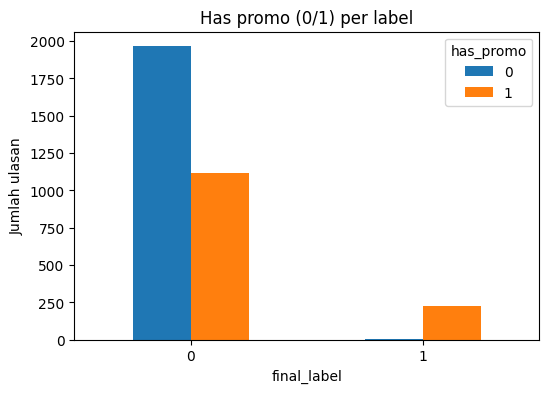

In [28]:
ct_promo = pd.crosstab(df["final_label"], df["has_promo"])
print("\nTabel frekuensi has_promo per label:")
print(ct_promo)

ct_promo_prop = pd.crosstab(df["final_label"], df["has_promo"], normalize="index")
print("\nProporsi has_promo per label:")
print(ct_promo_prop)

ct_promo.plot(kind="bar", figsize=(6,4))
plt.xlabel("final_label")
plt.ylabel("Jumlah ulasan")
plt.title("Has promo (0/1) per label")
plt.legend(title="has_promo")
plt.xticks(rotation=0)
plt.show()


Tabel frekuensi has_promo per label:
has_promo       0     1
final_label            
0            1965  1116
1               4   227

Proporsi has_promo per label:
has_promo           0         1
final_label                    
0            0.637780  0.362220
1            0.017316  0.982684


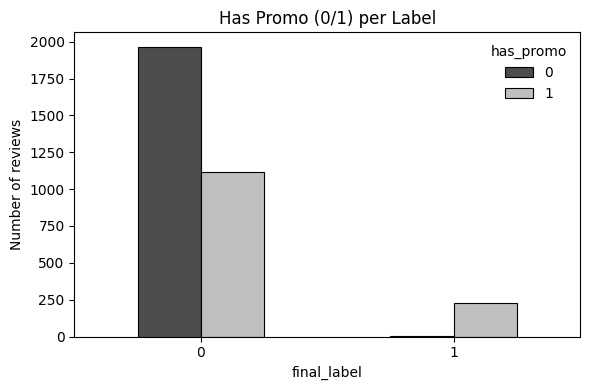

In [30]:
ct_promo = pd.crosstab(df["final_label"], df["has_promo"])
print("\nTabel frekuensi has_promo per label:")
print(ct_promo)

ct_promo_prop = pd.crosstab(df["final_label"], df["has_promo"], normalize="index")
print("\nProporsi has_promo per label:")
print(ct_promo_prop)

# === Bar Chart Grayscale (IEEE style) ===
ax = ct_promo.plot(
    kind="bar",
    figsize=(6,4),
    color=["#4D4D4D", "#BFBFBF"],  # abu-abu tua & abu-abu muda
    edgecolor="black",
    linewidth=0.8
)

plt.xlabel("final_label")
plt.ylabel("Number of reviews")
plt.title("Has Promo (0/1) per Label")
plt.legend(title="has_promo", frameon=False)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
